# Ingest Multidimensional Raster Data

In [10]:
# Import necessary modules and packages
import arcpy
import json
from arcpy.ia import * # also available with sa module

In [11]:
# Ingest grided data from a netCDF file and read it a multidimensional raster in ArcGIS Pro
# Syntax:  Raster (inRaster, {is_multidimensional})

outMDraster = Raster(r"C:\DevSummit2022\data\ncom_glb_regp01_2013031900.nc", True)

In [12]:
# Check out the variables in the multidimensional raster object
outMDraster.variables

['salinity(StdTime=25, StdZ=40)', 'surf_el(StdTime=25)', 'water_temp(StdTime=25, StdZ=40)', 'water_u(StdTime=25, StdZ=40)', 'water_v(StdTime=25, StdZ=40)']

In [13]:
# Check out all multidimensional information from the multidimensional raster object
# water_temp(StdTime=25, StdZ=40) variable is a 4-dimensional data
info = json.loads(outMDraster.mdinfo)
print(json.dumps(info, indent=2))

{
  "variables": [
    {
      "name": "salinity",
      "unit": "psu",
      "attributes": {
        "long_name": "Salinity",
        "NAVO_code": "16",
        "missing_value": "-30000",
        "scale_factor": 0.0010000000474974513,
        "add_offset": 20
      },
      "dimensions": [
        {
          "name": "StdTime",
          "field": "StdTime",
          "unit": "ISO8601",
          "interval": 3,
          "hasRegularIntervals": true,
          "intervalUnit": "Hours",
          "extent": [
            "2013-03-19T00:00:00",
            "2013-03-22T00:00:00"
          ],
          "hasRanges": false,
          "values": [
            "2013-03-19T00:00:00",
            "2013-03-19T03:00:00",
            "2013-03-19T06:00:00",
            "2013-03-19T09:00:00",
            "2013-03-19T12:00:00",
            "2013-03-19T15:00:00",
            "2013-03-19T18:00:00",
            "2013-03-19T21:00:00",
            "2013-03-20T00:00:00",
            "2013-03-20T03:00:00",
     

}


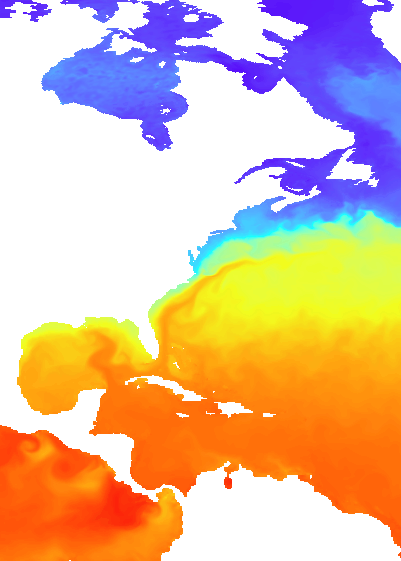

In [14]:
# Subset MD data for specific time, and all depth
# Syntax: Subset (in_raster, {variables}, {dimension_definitions})
MD_time1_alldepth = Subset(outMDraster, "water_temp", {"StdTime": ('2013-03-19T12:00:00', None, 1, 'year')})
MD_time1_alldepth

In [15]:
MD_time1_alldepth.mdinfo

'{"variables":[{"name":"water_temp","unit":"degC","attributes":{"long_name":"Water Temperature","NAVO_code":"15","missing_value":"-30000","scale_factor":0.0010000000474974513,"add_offset":20},"dimensions":[{"name":"StdTime","field":"StdTime","unit":"ISO8601","extent":["2013-03-19T12:00:00","2013-03-19T12:00:00"],"hasRanges":false,"values":["2013-03-19T12:00:00"]},{"name":"StdZ","field":"StdZ","unit":"Meters","interval":2,"hasRegularIntervals":false,"intervalUnit":"Meters","extent":["-5000","0"],"hasRanges":false,"values":["-5000","-4000","-3000","-2500","-2000","-1500","-1250","-1000","-900","-800","-700","-600","-500","-400","-350","-300","-250","-200","-150","-125","-100","-90","-80","-70","-60","-50","-45","-40","-35","-30","-25","-20","-15","-12","-10","-8","-6","-4","-2","0"]}]}],"layout":1}'

In [16]:
# Slice MD data for depth = 0
MD_time1_depth1 = Subset(MD_time1_alldepth, "water_temp", {"StdZ": 0})
MD_time1_depth1.mdinfo

'{"variables":[{"name":"water_temp","unit":"degC","attributes":{"long_name":"Water Temperature","NAVO_code":"15","missing_value":"-30000","scale_factor":0.0010000000474974513,"add_offset":20},"dimensions":[{"name":"StdTime","field":"StdTime","unit":"ISO8601","extent":["2013-03-19T12:00:00","2013-03-19T12:00:00"],"hasRanges":false,"values":["2013-03-19T12:00:00"]},{"name":"StdZ","field":"StdZ","unit":"Meters","extent":["0","0"],"hasRanges":false,"values":["0"]}]}],"layout":1}'

In [17]:
# Slice MD data for a given time and given depth
Slice_time1_depth1 = Subset(outMDraster, "water_temp", {"StdTime": ('2013-03-19T12:00:00', None, 1, 'year'), "StdZ": 0})
Slice_time1_depth1.mdinfo

'{"variables":[{"name":"water_temp","unit":"degC","attributes":{"long_name":"Water Temperature","NAVO_code":"15","missing_value":"-30000","scale_factor":0.0010000000474974513,"add_offset":20},"dimensions":[{"name":"StdTime","field":"StdTime","unit":"ISO8601","extent":["2013-03-19T12:00:00","2013-03-19T12:00:00"],"hasRanges":false,"values":["2013-03-19T12:00:00"]},{"name":"StdZ","field":"StdZ","unit":"Meters","extent":["0","0"],"hasRanges":false,"values":["0"]}]}],"layout":1}'

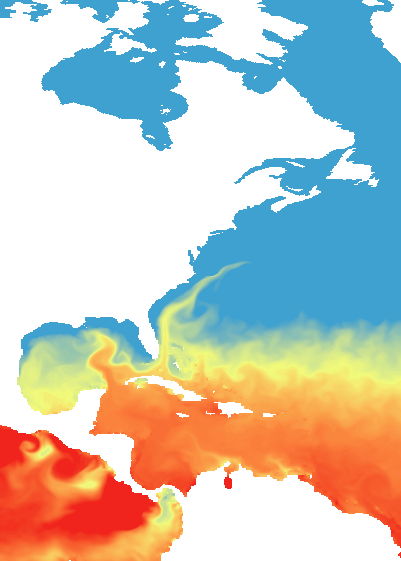

In [18]:
# Render your data to a slope map
# Render is available with the ia module only
rendered_raster = Render(Slice_time1_depth1, rendering_rule= {'min': 20, 'max': 28}, colormap="Prediction")
rendered_raster

References

Data source: https://www.navo.navy.mil/
ArcGIS Pro documentation: https://pro.arcgis.com/en/pro-app/latest/arcpy/classes/raster-object.htm